# Python packages and importing data

In [72]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import StrMethodFormatter
import pprint
import re
import matplotlib.pyplot as plt
import seaborn as sns
input_features=pd.read_csv('https://github.com/SruthiSomaraju/SruthiSomaraju/blob/main/input_features.csv?raw=true')
target_values=pd.read_csv('https://github.com/SruthiSomaraju/SruthiSomaraju/blob/main/target_values.csv?raw=true')



In [73]:
#head and tail of input features
print('head values of the data set \n {} \n'.format(input_features.head(5)))
print('tail values of the data set \n {} \n'.format(input_features.tail(5)))

head values of the data set 
    building_id  ...  has_secondary_use_other
0       802906  ...                        0
1        28830  ...                        0
2        94947  ...                        0
3       590882  ...                        0
4       201944  ...                        0

[5 rows x 39 columns] 

tail values of the data set 
         building_id  ...  has_secondary_use_other
260596       688636  ...                        0
260597       669485  ...                        0
260598       602512  ...                        0
260599       151409  ...                        0
260600       747594  ...                        0

[5 rows x 39 columns] 



In [74]:
#head and tail of target values
print('head values of the data set \n {} \n'.format(target_values.head(5)))
print('tail values of the data set \n {} \n'.format(target_values.tail(5)))

head values of the data set 
    building_id  damage_grade
0       802906             3
1        28830             2
2        94947             3
3       590882             2
4       201944             3 

tail values of the data set 
         building_id  damage_grade
260596       688636             2
260597       669485             3
260598       602512             3
260599       151409             2
260600       747594             3 



In [75]:
#To find whether there are any nulls in input features
print('The null sums of input featues {}'.format(input_features.isna().sum().sum()))
print('The null sums of target values {}'.format(target_values.isna().sum().sum()))

The null sums of input featues 0
The null sums of target values 0


In [76]:
#to get make sure building id is primary key and have no duplicates
print('number of distinct values building id in input features',input_features['building_id'].nunique())
print('number of distinct values building id in target_values',target_values['building_id'].nunique())


number of distinct values building id in input features 260601
number of distinct values building id in target_values 260601


#Since the uniqueness is on the building_id merging with inner join.
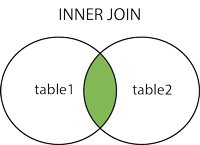

In [77]:
#count the number of unique building id's
merge=pd.merge(input_features,target_values,on='building_id')
merge['building_id'].nunique()

260601

Since the distinct count still stands at 260601 for building id, we can confirm that its a perfect match for the two data sets in the inner join.

In [78]:
print('head values of the data set \n {} \n'.format(merge.head(10)))
print('tail values of the data set \n {} \n'.format(merge.tail(10)))


head values of the data set 
    building_id  geo_level_1_id  ...  has_secondary_use_other  damage_grade
0       802906               6  ...                        0             3
1        28830               8  ...                        0             2
2        94947              21  ...                        0             3
3       590882              22  ...                        0             2
4       201944              11  ...                        0             3
5       333020               8  ...                        0             2
6       728451               9  ...                        0             3
7       475515              20  ...                        0             1
8       441126               0  ...                        0             2
9       989500              26  ...                        0             1

[10 rows x 40 columns] 

tail values of the data set 
         building_id  geo_level_1_id  ...  has_secondary_use_other  damage_grade
260591   

In [79]:
#The data types of the dataset.
print('The data types')
print(merge.dtypes,"\n")
print()
#The features of the dataset
print('The data features')
print(merge.info(),"\n")
#The data set description
print('The data description')
print(merge.describe(),"\n")
#The data set ranking
print('The data ranking')
print(merge.rank,"\n")
merge.describe().transpose().drop('count', axis=1)

The data types
building_id                                int64
geo_level_1_id                             int64
geo_level_2_id                             int64
geo_level_3_id                             int64
count_floors_pre_eq                        int64
age                                        int64
area_percentage                            int64
height_percentage                          int64
land_surface_condition                    object
foundation_type                           object
roof_type                                 object
ground_floor_type                         object
other_floor_type                          object
position                                  object
plan_configuration                        object
has_superstructure_adobe_mud               int64
has_superstructure_mud_mortar_stone        int64
has_superstructure_stone_flag              int64
has_superstructure_cement_mortar_stone     int64
has_superstructure_mud_mortar_brick        int64
has_s

,mean,std,min,25%,50%,75%,max
building_id,525675.482773,304544.999032,4.0,261190.0,525757.0,789762.0,1052934.0
geo_level_1_id,13.900353,8.033617,0.0,7.0,12.0,21.0,30.0
geo_level_2_id,701.074685,412.710734,0.0,350.0,702.0,1050.0,1427.0
geo_level_3_id,6257.876148,3646.369645,0.0,3073.0,6270.0,9412.0,12567.0
count_floors_pre_eq,2.129723,0.727665,1.0,2.0,2.0,2.0,9.0
age,26.535029,73.565937,0.0,10.0,15.0,30.0,995.0
area_percentage,8.018051,4.392231,1.0,5.0,7.0,9.0,100.0
height_percentage,5.434365,1.918418,2.0,4.0,5.0,6.0,32.0
has_superstructure_adobe_mud,0.088645,0.284231,0.0,0.0,0.0,0.0,1.0
has_superstructure_mud_mortar_stone,0.761935,0.425900,0.0,1.0,1.0,1.0,1.0


In [80]:
#To find whether there are any nullsin merged data set
print('The null sum')
merge.isna().sum().sum()

The null sum


0

In [81]:
#to check duplicate columns/attributes
def getDuplicateColumns(df):
  
    # Create an empty set
    duplicateColumnNames = set()
      
    # Iterate through all the columns 
    # of dataframe
    for x in range(df.shape[1]):
          
        # Take column at xth index.
        col = df.iloc[:, x]
          
        # Iterate through all the columns in
        # DataFrame from (x + 1)th index to
        # last index
        for y in range(x + 1, df.shape[1]):
              
            # Take column at yth index.
            otherCol = df.iloc[:, y]
              
            # Check if two columns at x & y
            # index are equal or not,
            # if equal then adding 
            # to the set
            if col.equals(otherCol):
                duplicateColumnNames.add(df.columns.values[y])
                  
    # Return list of unique column names 
    # whose contents are duplicates.
    return list(duplicateColumnNames)
  
duplicateColNames = getDuplicateColumns(merge)
  
print('Duplicate Columns/attributes are :')
        
    # Iterate through duplicate
    # column names
for column in duplicateColNames :
    print('Column Name : ', column)

Duplicate Columns/attributes are :


In [82]:
#to check cases where more than one structure(slice and slum)
df0=merge.copy()
df=merge.iloc[:,15:26]
df1=df.sum(axis=1)>1
df0['sum']=df.sum(axis=1)
# df0
#to check for more than 1 structure
print('count of more than one superstructure for building')
print(df0.loc[(df0['sum']>1)].shape[0])
#84585 buildings have more than 1 structure

count of more than one superstructure for building
84585


In [83]:
#to check cases where more than one usage(slice and slum)
df2=merge.copy()
df3=merge.iloc[:,29:39]
df3
df2['sum']=df3.sum(axis=1)
# # # #to check for more than 1 structure
print('count of more than one usage for building')
print(df2.loc[(df2['sum']>1)].shape[0])

#29156 buildings have a secondary usage
#to cross validate has secondary use represents all the usages
print('The observation count for atleast one usage')
print(df2.loc[(df2['sum']>=1)].shape[0])
print('The observation count for atleast one usage and usage represented by has_secondary_use')
print(df2.loc[(df2['sum']>=1) & (df2['has_secondary_use']==1)].shape[0])

count of more than one usage for building
557
The observation count for atleast one usage
29156
The observation count for atleast one usage and usage represented by has_secondary_use
29156


##Univariate analysis and quality of data(EDA)

To change object data types to categorical at once

In [84]:
#to get the attributes grouped according to data types
groups =merge.columns.to_series().groupby(merge.dtypes).groups
print(groups)

{int64: ['building_id', 'geo_level_1_id', 'geo_level_2_id', 'geo_level_3_id', 'count_floors_pre_eq', 'age', 'area_percentage', 'height_percentage', 'has_superstructure_adobe_mud', 'has_superstructure_mud_mortar_stone', 'has_superstructure_stone_flag', 'has_superstructure_cement_mortar_stone', 'has_superstructure_mud_mortar_brick', 'has_superstructure_cement_mortar_brick', 'has_superstructure_timber', 'has_superstructure_bamboo', 'has_superstructure_rc_non_engineered', 'has_superstructure_rc_engineered', 'has_superstructure_other', 'count_families', 'has_secondary_use', 'has_secondary_use_agriculture', 'has_secondary_use_hotel', 'has_secondary_use_rental', 'has_secondary_use_institution', 'has_secondary_use_school', 'has_secondary_use_industry', 'has_secondary_use_health_post', 'has_secondary_use_gov_office', 'has_secondary_use_use_police', 'has_secondary_use_other', 'damage_grade'], object: ['land_surface_condition', 'foundation_type', 'roof_type', 'ground_floor_type', 'other_floor_typ

In [85]:
#picking which type we want changed and the variables in that type
cols=[]
for key,value in groups.items():
  if key=='object':
    cols=value

#changing into the desired data type
print(cols)
merge_2= merge.copy()
def to_int(df, cols):
            df[cols] = df[cols].astype('category')
            return df
to_int(merge_2, cols)
merge_2.dtypes

Index(['land_surface_condition', 'foundation_type', 'roof_type',
       'ground_floor_type', 'other_floor_type', 'position',
       'plan_configuration', 'legal_ownership_status'],
      dtype='object')


building_id                                  int64
geo_level_1_id                               int64
geo_level_2_id                               int64
geo_level_3_id                               int64
count_floors_pre_eq                          int64
age                                          int64
area_percentage                              int64
height_percentage                            int64
land_surface_condition                    category
foundation_type                           category
roof_type                                 category
ground_floor_type                         category
other_floor_type                          category
position                                  category
plan_configuration                        category
has_superstructure_adobe_mud                 int64
has_superstructure_mud_mortar_stone          int64
has_superstructure_stone_flag                int64
has_superstructure_cement_mortar_stone       int64
has_superstructure_mud_mortar_b

In [86]:
groups_2 =merge_2.columns.tolist()
print(groups_2)

['building_id', 'geo_level_1_id', 'geo_level_2_id', 'geo_level_3_id', 'count_floors_pre_eq', 'age', 'area_percentage', 'height_percentage', 'land_surface_condition', 'foundation_type', 'roof_type', 'ground_floor_type', 'other_floor_type', 'position', 'plan_configuration', 'has_superstructure_adobe_mud', 'has_superstructure_mud_mortar_stone', 'has_superstructure_stone_flag', 'has_superstructure_cement_mortar_stone', 'has_superstructure_mud_mortar_brick', 'has_superstructure_cement_mortar_brick', 'has_superstructure_timber', 'has_superstructure_bamboo', 'has_superstructure_rc_non_engineered', 'has_superstructure_rc_engineered', 'has_superstructure_other', 'legal_ownership_status', 'count_families', 'has_secondary_use', 'has_secondary_use_agriculture', 'has_secondary_use_hotel', 'has_secondary_use_rental', 'has_secondary_use_institution', 'has_secondary_use_school', 'has_secondary_use_industry', 'has_secondary_use_health_post', 'has_secondary_use_gov_office', 'has_secondary_use_use_police

#Super Structure

Number of unique values for the variables
 has_superstructure_adobe_mud              2
has_superstructure_mud_mortar_stone       2
has_superstructure_stone_flag             2
has_superstructure_cement_mortar_stone    2
has_superstructure_mud_mortar_brick       2
has_superstructure_cement_mortar_brick    2
has_superstructure_timber                 2
has_superstructure_bamboo                 2
has_superstructure_rc_non_engineered      2
has_superstructure_rc_engineered          2
has_superstructure_other                  2
dtype: int64
frequency of column has_superstructure_adobe_mud is 
0    237500
1     23101
Name: has_superstructure_adobe_mud, dtype: int64
frequency of column has_superstructure_mud_mortar_stone is 
1    198561
0     62040
Name: has_superstructure_mud_mortar_stone, dtype: int64
frequency of column has_superstructure_stone_flag is 
0    251654
1      8947
Name: has_superstructure_stone_flag, dtype: int64
frequency of column has_superstructure_cement_mortar_stone is 
0  

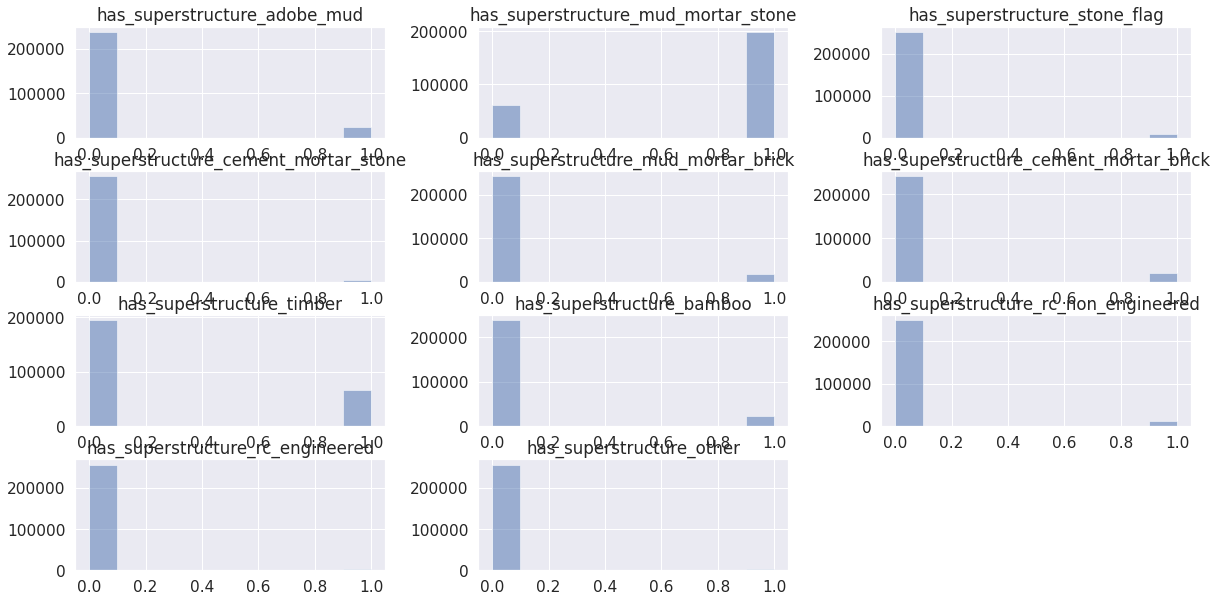

In [87]:
def get_col_names_numeric(data,string,dframe):
  cols=[]
  for value in data:
    if re.match(string,value):
      cols.append(value)
  dframe.hist(column=cols,alpha=0.5, figsize=(20, 10))
  uniqueValues = dframe[cols].nunique(dropna=True)
  #already found no missing
  print('Number of unique values for the variables\n',uniqueValues)
  for value in cols:
    print('frequency of column {} is \n{}'.format(value,merge_2[value].value_counts()))

get_col_names_numeric(groups_2,"has_superstructure",merge_2)

The work proves that every superstructure variable has a perfect binary charactersitics throughout each variable with no outliers or extreme values

#Secondary Usage

Number of unique values for the variables
 has_secondary_use                2
has_secondary_use_agriculture    2
has_secondary_use_hotel          2
has_secondary_use_rental         2
has_secondary_use_institution    2
has_secondary_use_school         2
has_secondary_use_industry       2
has_secondary_use_health_post    2
has_secondary_use_gov_office     2
has_secondary_use_use_police     2
has_secondary_use_other          2
dtype: int64
frequency of column has_secondary_use is 
0    231445
1     29156
Name: has_secondary_use, dtype: int64
frequency of column has_secondary_use_agriculture is 
0    243824
1     16777
Name: has_secondary_use_agriculture, dtype: int64
frequency of column has_secondary_use_hotel is 
0    251838
1      8763
Name: has_secondary_use_hotel, dtype: int64
frequency of column has_secondary_use_rental is 
0    258490
1      2111
Name: has_secondary_use_rental, dtype: int64
frequency of column has_secondary_use_institution is 
0    260356
1       245
Name: has_secon

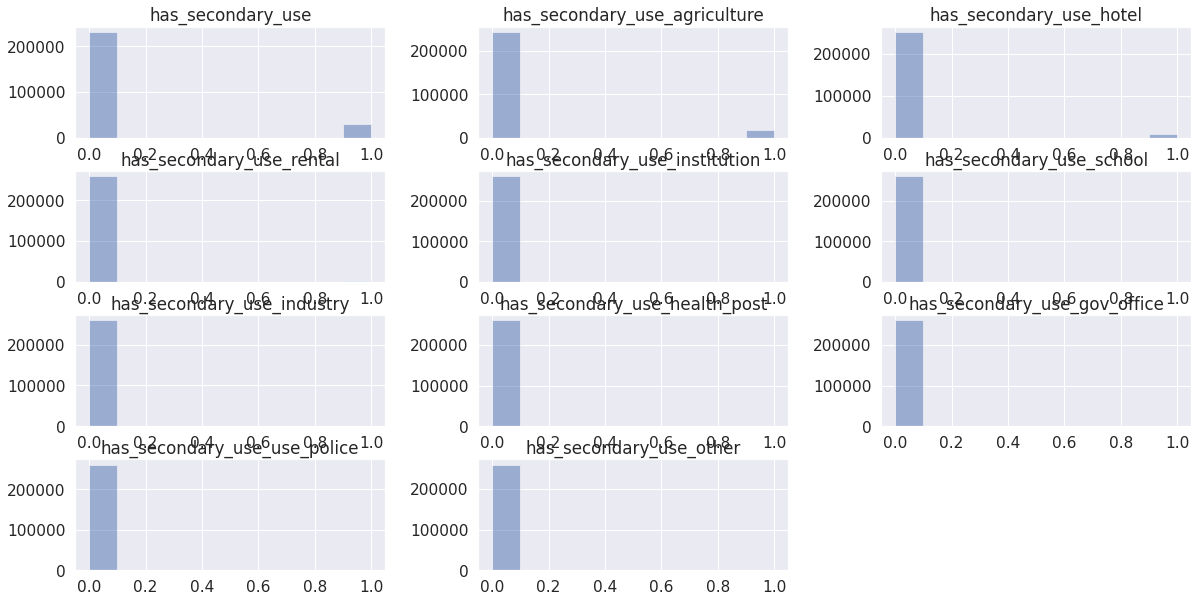

In [88]:
get_col_names_numeric(groups_2,"has_secondary",merge_2)

The work proves that every secondary usage variable has a perfect binary charactersitics throughout each variable with no outliers or extreme values

#Age

Number of unique values for the variables
 age    42
dtype: int64
frequency of column age is 
10     38896
15     36010
5      33697
20     32182
0      26041
25     24366
30     18028
35     10710
40     10559
50      7257
45      4711
60      3612
80      3055
55      2033
70      1975
995     1390
100     1364
65      1123
90      1085
85       847
75       512
95       414
120      180
150      142
200      106
110      100
105       89
125       37
115       21
140        9
130        9
180        7
160        6
170        6
175        5
135        5
145        3
190        3
195        2
165        2
155        1
185        1
Name: age, dtype: int64


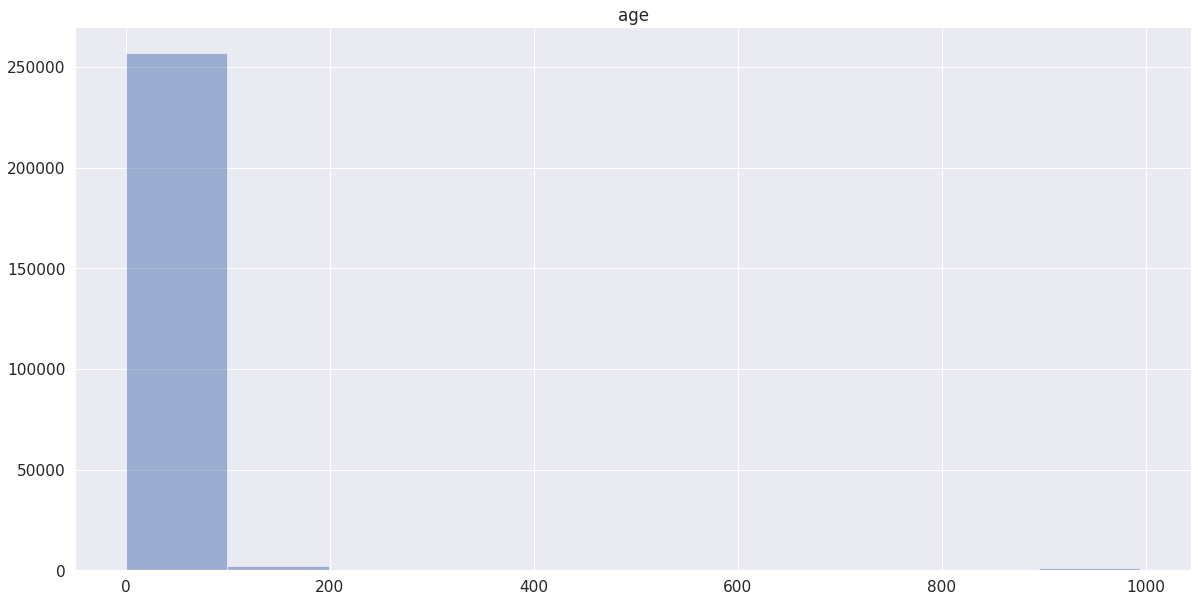

In [89]:
get_col_names_numeric(groups_2,"age",merge_2)

Trying to figure out what sort of data does age 995 has since it seem really prehistoric

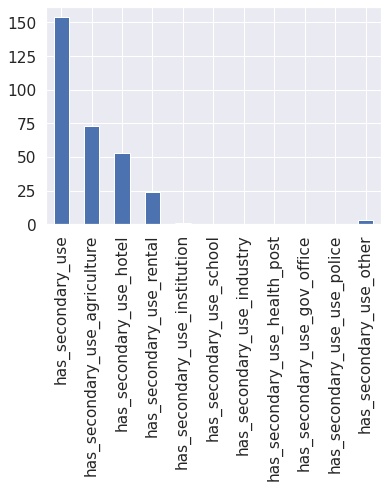

In [90]:
subset_age=merge_2[(merge_2.age == 995)].copy()
subset_age

#to check where any usage is there
df2=subset_age.copy()
df3=subset_age.iloc[:,28:39]
df3
df2['sum']=df3.sum(axis=1)
# # #to check for more than 1 structure
df4=df2.loc[(df2['sum']>=1)]
df5=df4.iloc[:,28:39].sum(axis = 0, skipna = True)
df5.plot(kind='bar')

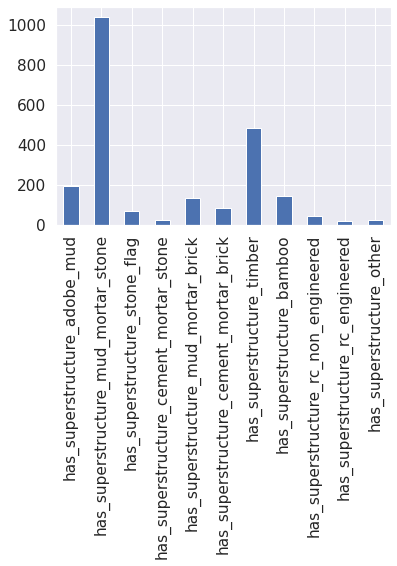

In [91]:
#to check what superstructure is there
df2=subset_age.copy()
df3=subset_age.iloc[:,15:26]
df3
df2['sum']=df3.sum(axis=1)
# # #to check for more than 1 structure
df4=df2.loc[(df2['sum']>=1)]
df5=df4.iloc[:,15:26].sum(axis = 0, skipna = True)
df5.plot(kind='bar')

#Number of floors

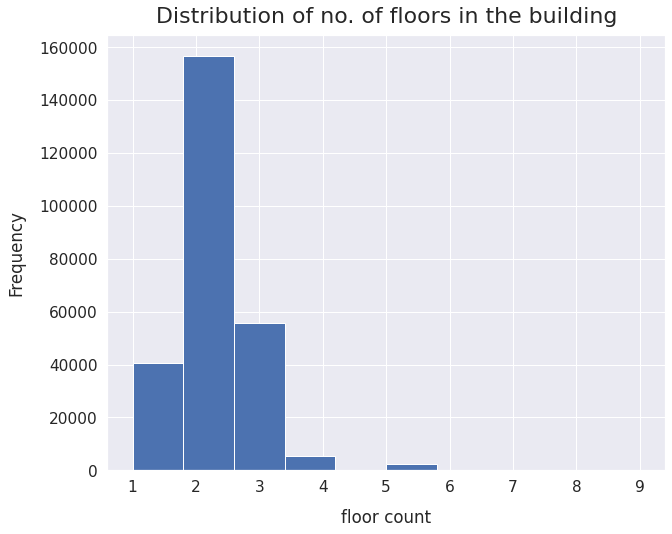

In [92]:
#frequency plots
sns.set(font_scale=1.4)
merge['count_floors_pre_eq'].plot(kind='hist', figsize=(10,8), align='mid');
plt.xlabel("floor count", labelpad=14)
plt.ylabel("Frequency", labelpad=14)
plt.title("Distribution of no. of floors in the building", y=1.015, fontsize=22);

#

#Looking into normalized columns

area_percentage
height_percentage
Number of unique values for the variables
 area_percentage      84
height_percentage    27
dtype: int64
frequency of column area_percentage is 
6      42013
7      36752
5      32724
8      28445
9      22199
       ...  
82         1
80         1
78         1
75         1
100        1
Name: area_percentage, Length: 84, dtype: int64
frequency of column height_percentage is 
5     78513
6     46477
4     37763
7     35465
3     25957
8     13902
2      9305
9      5376
10     4492
11      917
12      907
13      759
15      292
16      179
32       75
18       71
14       66
20       33
21       13
23       11
17        9
19        7
24        4
25        3
26        2
28        2
31        1
Name: height_percentage, dtype: int64


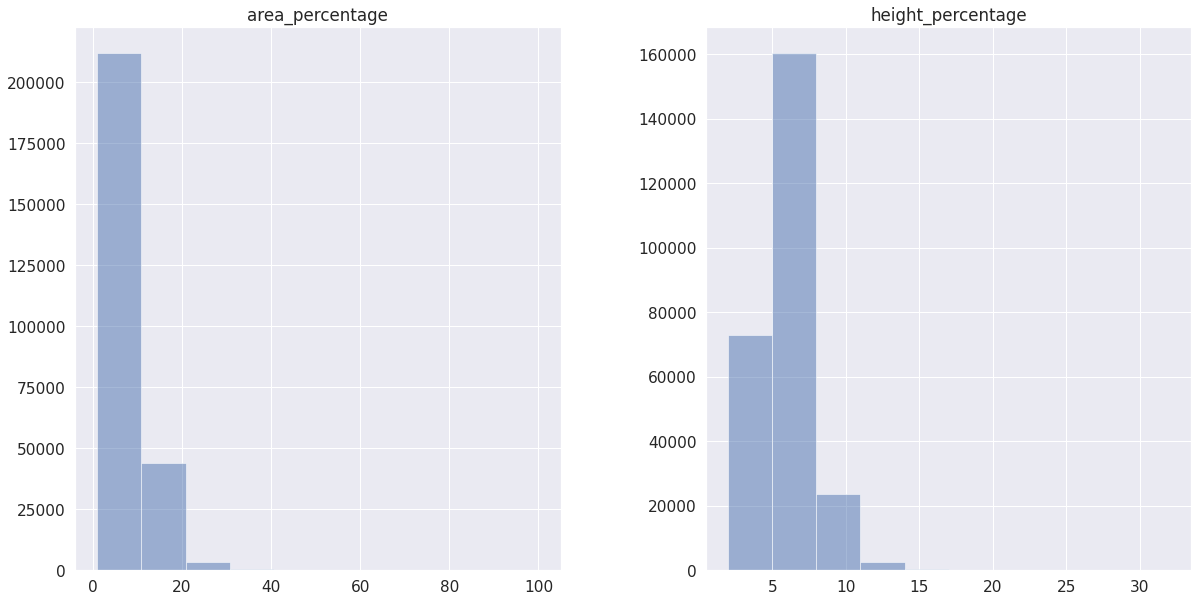

In [93]:
#Looking into normalized columns
cols=[]
def get_col_names(data,string,dframe):
  for value in data:
    if string in value:
      print(value)
      cols.append(value)
  dframe.hist(column=cols,alpha=0.5, figsize=(20, 10))
  uniqueValues = dframe[cols].nunique(dropna=True)
  #already found no missing
  print('Number of unique values for the variables\n',uniqueValues)
  for value in cols:
    print('frequency of column {} is \n{}'.format(value,merge_2[value].value_counts()))

get_col_names(groups_2,"_percentage",merge_2)



#Distribution of Damage Grade

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


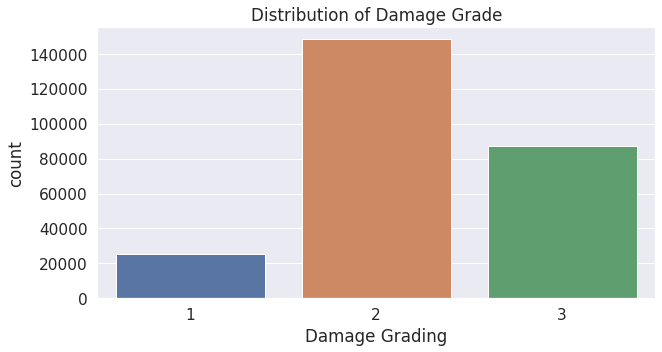

In [94]:
#distribution of damage grade
plt.figure(figsize=(10,5))
ax = sns.countplot(merge_2['damage_grade'])
plt.title("Distribution of Damage Grade")
plt.xlabel("Damage Grading")
plt.show()

#Distribution of Roof Tyeps

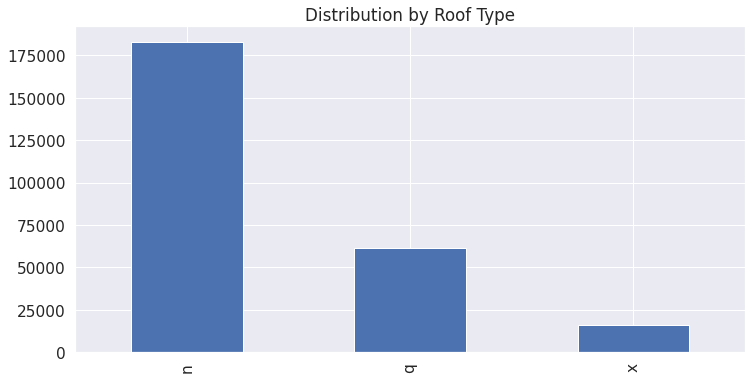

In [95]:
plt.figure(figsize = (12,6))
ax = merge_2.roof_type.value_counts().plot(kind = "bar")
plt.title("Distribution by Roof Type")
plt.show()

##Research question 1

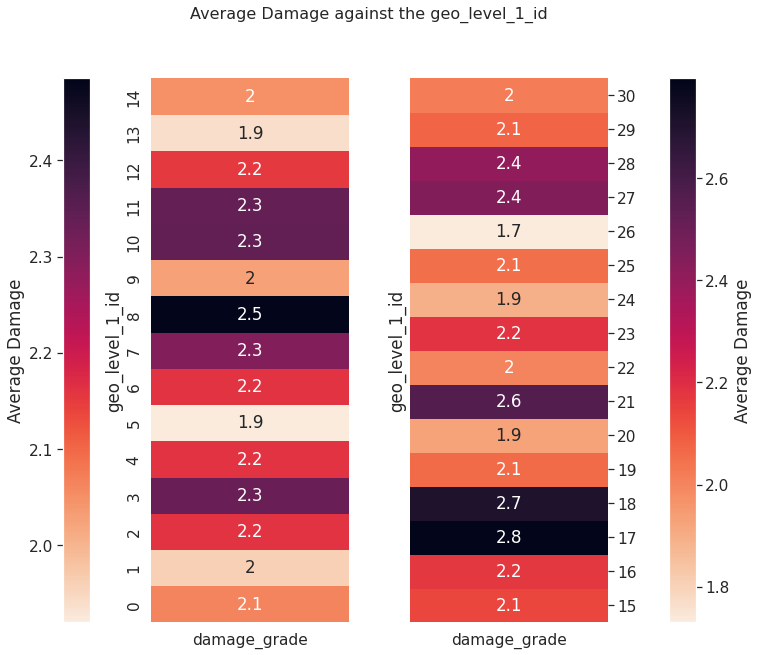

In [96]:
#Pivoting the table into get damage grade against the geo level id_1
geo=merge_2[['geo_level_1_id','damage_grade']].copy()
df1 = geo[geo['geo_level_1_id'] <15]
df2 = geo[geo['geo_level_1_id'] >= 15]
# df3= geo[geo['geo_level_1_id'] >= 20]
df_1 = df1.pivot_table(
    index=['geo_level_1_id'],
    # columns='Delivery',
    # values=['Balance', 'Price'],
    aggfunc={
        'damage_grade':np.mean,
    }
)
df_1
df_2 = df2.pivot_table(
    index=['geo_level_1_id'],
    # columns='Delivery',
    # values=['Balance', 'Price'],
    aggfunc={
        'damage_grade':np.mean,
    }
)
df_2
#Making the heatmaps
fig, (ax,ax2) = plt.subplots(ncols=2,figsize=(12,10))
fig.subplots_adjust(wspace=0.2)
fig.suptitle('Average Damage against the geo_level_1_id', fontsize=16)

#Using Seaborn Heat map
sns.heatmap(df_1, cmap="rocket_r", ax=ax, cbar=False,annot = True)
sns.heatmap(df_2, cmap="rocket_r", ax=ax2, cbar=False,annot = True)


#Externally making the cbar of the heatmap
cbar1=fig.colorbar(ax.collections[0], ax=ax,location="left", use_gridspec=False, pad=0.2,label='Average Damage')
cbar2=fig.colorbar(ax2.collections[0], ax=ax2,location="right", use_gridspec=False, pad=0.2,label='Average Damage')

#changing axis levels and rotations to make better meaning
ax.invert_yaxis()
ax2.invert_yaxis()
ax2.yaxis.tick_right()
ax2.tick_params(rotation=0)

plt.show()

High averaged geo id 1 has higher damage.
17 really high
8 really high

#Question 2

Text(117.75, 0.5, 'FREQUENCY')

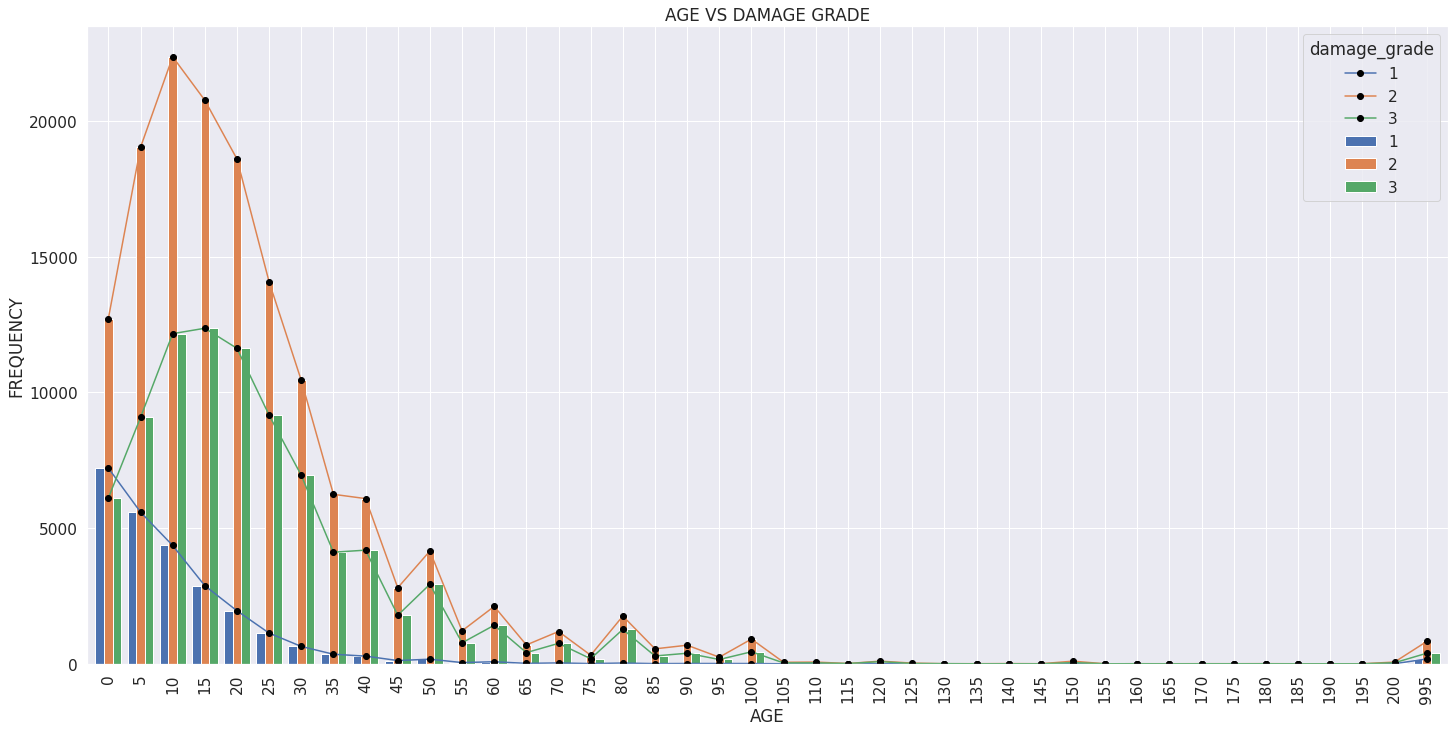

In [97]:
#copying for safety of the data set purpose
merge_plot=merge_2[['age','damage_grade']].copy()
%matplotlib inline

#making the required pivot table to get damage grade against age
df_piv2=merge_plot.pivot_table(index=['age'],columns=['damage_grade'],aggfunc=len, fill_value=0)

#initializing figure object and axis
fig, ax = plt.subplots(1,1,sharex='all',figsize=(20,10))

#reseting pivot table for line chart
df_piv3=df_piv2.reset_index()
del df_piv3['age']

#Drawing line chart
df_piv3.plot(ax=ax,marker='o',markeredgecolor='black', markerfacecolor='black')

#plotting a grouped bar plot
df_piv2.plot.bar(width=0.8, ax=ax);
plt.tight_layout()
plt.title("AGE VS DAMAGE GRADE")
plt.xlabel("AGE")
plt.ylabel("FREQUENCY")

High averaged geo id 1 has higher damage. 17 really high 8 really high

#Question 03

No handles with labels found to put in legend.


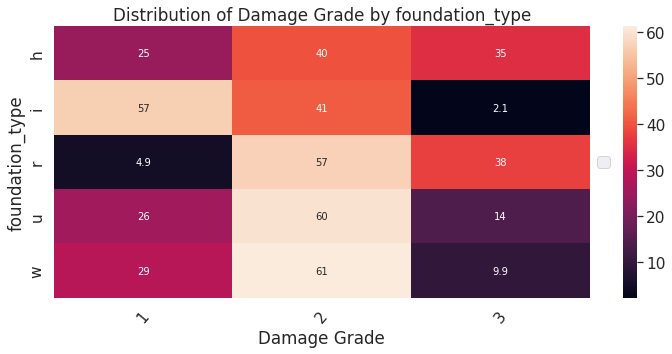

In [98]:

####creation of heatmap
# Calculate counts
df_temp = merge_2.groupby(['foundation_type','damage_grade']).size().reset_index(name='count')

# Set Index
df_temp = df_temp.set_index(['foundation_type', 'damage_grade'])

# Calculate Proportion of grade
df_temp = df_temp.groupby(level=0).apply(lambda x: 100 * x / float(x.sum())).reset_index()

# Pivot table
df_temp = pd.pivot_table(df_temp, values='count', index=['foundation_type'], columns='damage_grade')

# Plot char
plt.figure(figsize=(12,5))
ax = sns.heatmap(data = df_temp, annot = True )
plt.xticks(rotation = 50)
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5), ncol=1)
plt.title("Distribution of Damage Grade by foundation_type")
plt.xlabel("Damage Grade")
plt.ylabel("foundation_type")
plt.show()

# Clean up
del df_temp, ax


#Question 04

#position

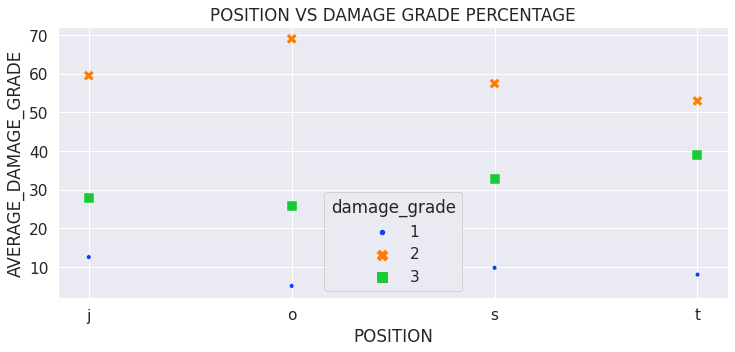

In [99]:
%matplotlib inline
#getting the position vs damage grade data
df_a=merge_2[['position','damage_grade']].copy()
df_a['damage_grade'].astype('category')

#Cusstomizing and getting percentages
df_a=df_a.groupby(['position','damage_grade']).size().reset_index(name='count')
df_a = df_a.set_index(['position','damage_grade'])
df_a = df_a.groupby(level=0).apply(lambda x: 100 * x / float(x.sum())).reset_index()

#Plotting the figure
plt.figure(figsize=(12,5))
sns.scatterplot(y='count', x='position', 
                 data=df_a, 
                 palette='bright',
                 hue='damage_grade',
               style="damage_grade",
                size="damage_grade",
                sizes=(20, 200),
                 legend="full")
plt.title("POSITION VS DAMAGE GRADE PERCENTAGE")
plt.xlabel("POSITION")
plt.ylabel("AVERAGE_DAMAGE_GRADE")
plt.show()

#plan conifguration

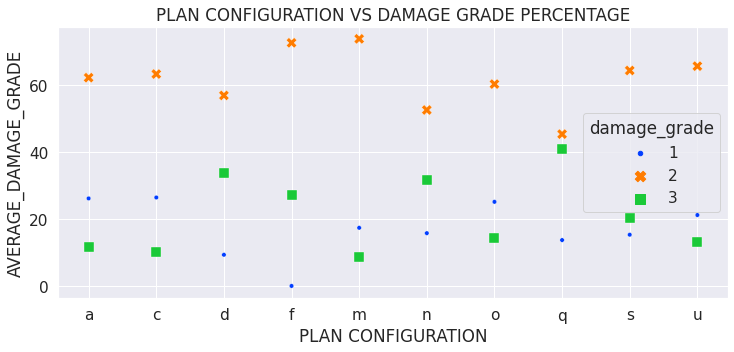

In [100]:
%matplotlib inline
#getting the plan configuration vs damage grade data
df_a=merge_2[['plan_configuration','damage_grade']].copy()
df_a['damage_grade'].astype('category')

#Cusstomizing and getting percentages
df_a=df_a.groupby(['plan_configuration','damage_grade']).size().reset_index(name='count')
df_a = df_a.set_index(['plan_configuration','damage_grade'])
df_a = df_a.groupby(level=0).apply(lambda x: 100 * x / float(x.sum())).reset_index()

#Plotting the figure
plt.figure(figsize=(12,5))
sns.scatterplot(y='count', x='plan_configuration', 
                 data=df_a, 
                 palette='bright',
                 hue='damage_grade',
               style="damage_grade",
                size="damage_grade",
                sizes=(20, 200),
                 legend="full")
plt.title("PLAN CONFIGURATION VS DAMAGE GRADE PERCENTAGE")
plt.xlabel('PLAN CONFIGURATION')
plt.ylabel("AVERAGE_DAMAGE_GRADE")
plt.show()

#area and height

Text(0.5, 1.0, 'HEIGHT VS DAMAGE GRADE PERCENTAGE')

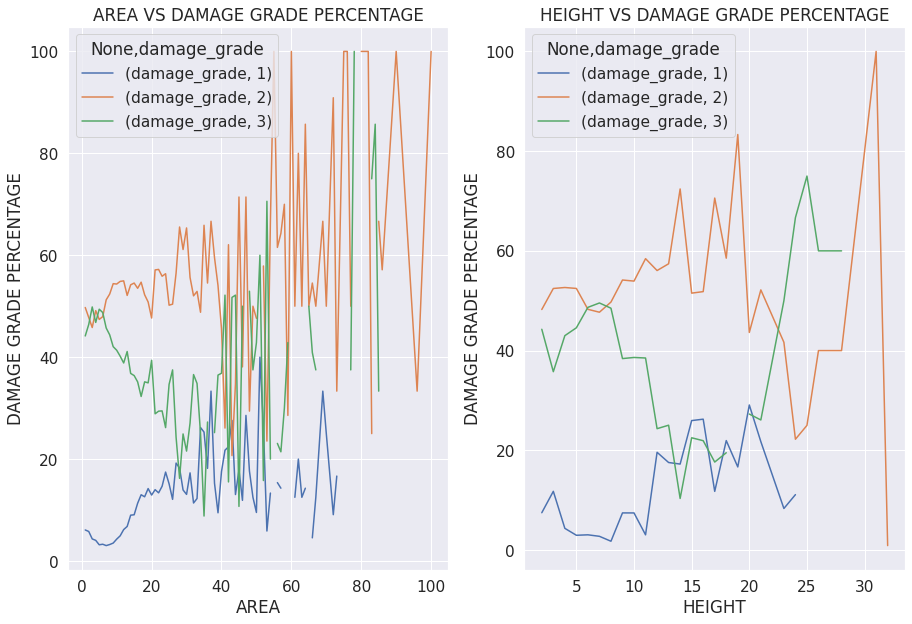

In [101]:
%matplotlib inline
#getting area vs damage grade data
df_a=merge_2[['area_percentage','damage_grade']].copy()

#Cusstomizing and getting percentages
fig, (ax,ax2) = plt.subplots(ncols=2,figsize=(15,10))
df_b=df_a.groupby(['area_percentage','damage_grade']).agg({'damage_grade':sum})
df_b['damage_grade'] = df_b.groupby(level=0).apply(lambda x:100 * x / float(x.sum()))
df_b.unstack().plot(kind='line',ax=ax)
ax.set_xlabel("AREA")
ax.set_ylabel("DAMAGE GRADE PERCENTAGE")
ax.set_title("AREA VS DAMAGE GRADE PERCENTAGE")



#getting height vs damage grade data
df_a=merge_2[['height_percentage','damage_grade']].copy()

#Cusstomizing and getting percentages
df_b=df_a.groupby(['height_percentage','damage_grade']).agg({'damage_grade':sum})
df_b = df_b.groupby(level=0).apply(lambda x:100 * x / float(x.sum()))
df_b.unstack().plot(kind='line',ax=ax2)
ax2.set_xlabel("HEIGHT")
ax2.set_ylabel("DAMAGE GRADE PERCENTAGE")
ax2.set_title("HEIGHT VS DAMAGE GRADE PERCENTAGE")


#Question 05

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  from ipykernel import kernelapp as app


Text(0.5, 1.0, 'SUPER STRUCTURE TYPE VS DAMAGE TAKEN')

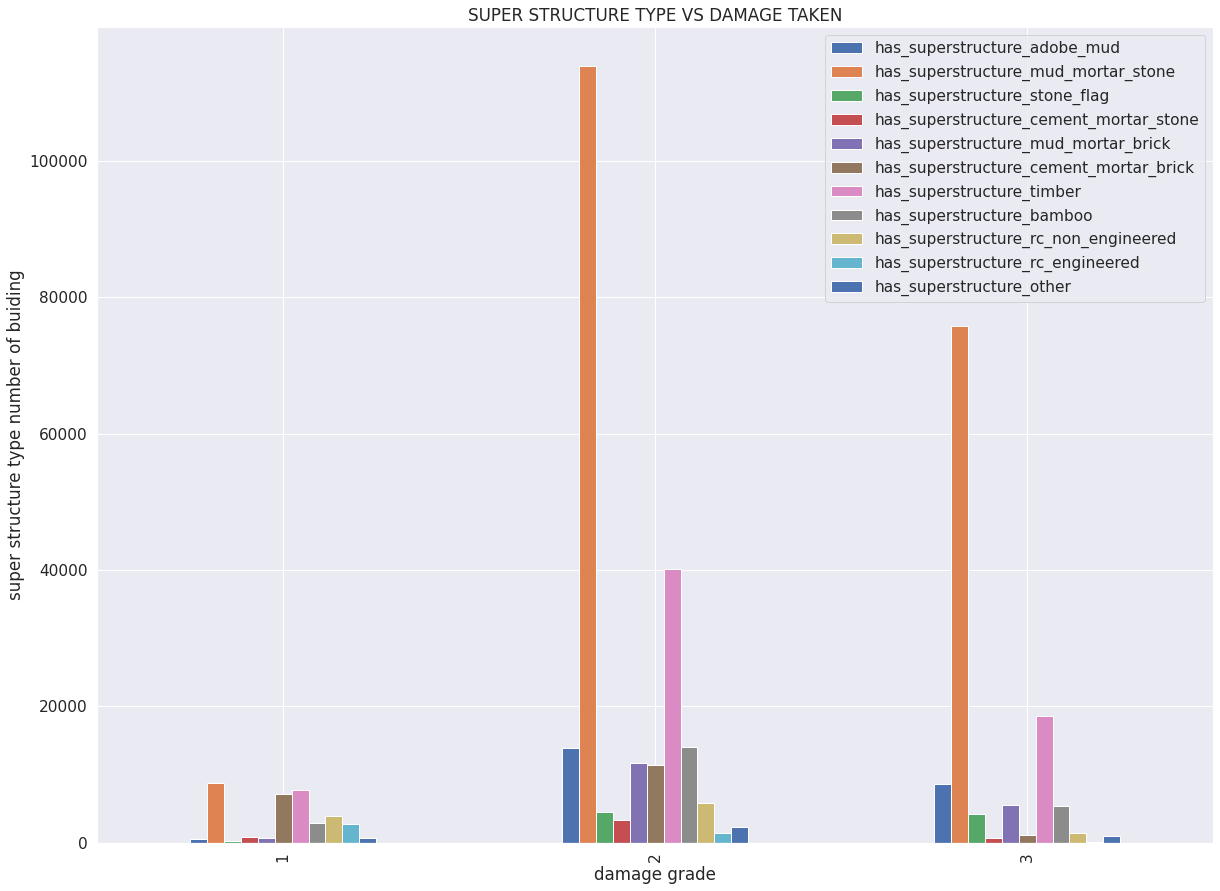

In [102]:
cols=[]
# df_a=
def get_col_names_numeric(data,string,dframe):

  for value in data:
    if re.match(string,value):
      cols.append(value)
  cols.append('damage_grade')    
  df_a = dframe[cols]
  return df_a

df_a=get_col_names_numeric(groups_2,"has_superstructure",merge_2)
df_a

df_b=df_a.groupby(['damage_grade'])['has_superstructure_adobe_mud', 
                   'has_superstructure_mud_mortar_stone', 
                   'has_superstructure_stone_flag', 'has_superstructure_cement_mortar_stone', 
                   'has_superstructure_mud_mortar_brick', 'has_superstructure_cement_mortar_brick',
                   'has_superstructure_timber', 'has_superstructure_bamboo', 'has_superstructure_rc_non_engineered',
                   'has_superstructure_rc_engineered', 
                   'has_superstructure_other'].apply(lambda x : x.astype(int).sum())
df_b

# Plot a bar chart using the DF
ax = df_b.plot(kind="bar")
# Get a Matplotlib figure from the axes object for formatting purposes
fig = ax.get_figure()
# Change the plot dimensions (width, height)
fig.set_size_inches(20, 15)

# Change the axes labels
ax.set_xlabel("damage grade")
ax.set_ylabel("super structure type number of buiding")
ax.set_title("SUPER STRUCTURE TYPE VS DAMAGE TAKEN")


#Question 6

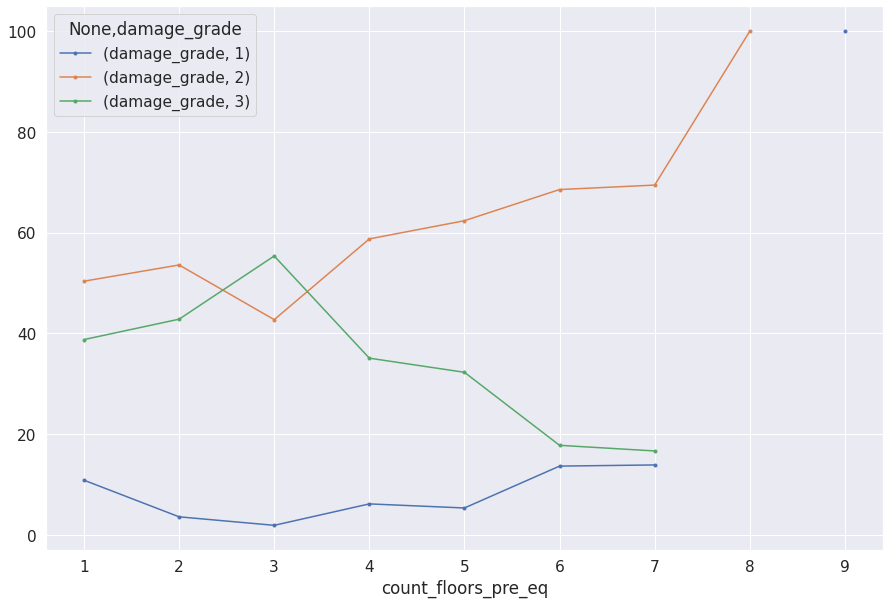

In [103]:
df_a=merge_2[['damage_grade','count_floors_pre_eq']].copy()

#group by and getting percentage for damage grade for each floor count
df_b=df_a.groupby(['count_floors_pre_eq','damage_grade']).agg({'damage_grade':sum})
df_b['damage_grade'] = df_b.groupby(level=0).apply(lambda x:100 * x / float(x.sum()))

#Plotting mutiple trend lines
df_b.unstack().plot(figsize=(15,10),marker="o", ms=3)


#Question 07

No handles with labels found to put in legend.


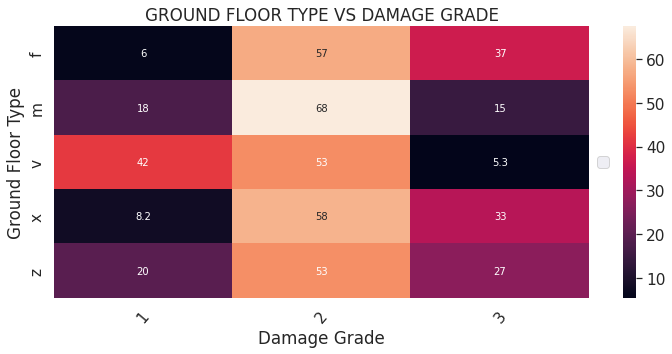

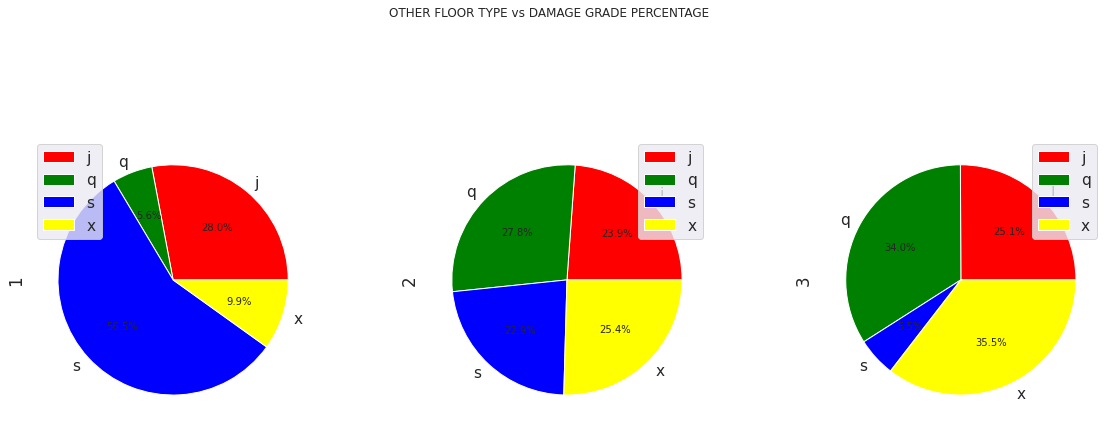

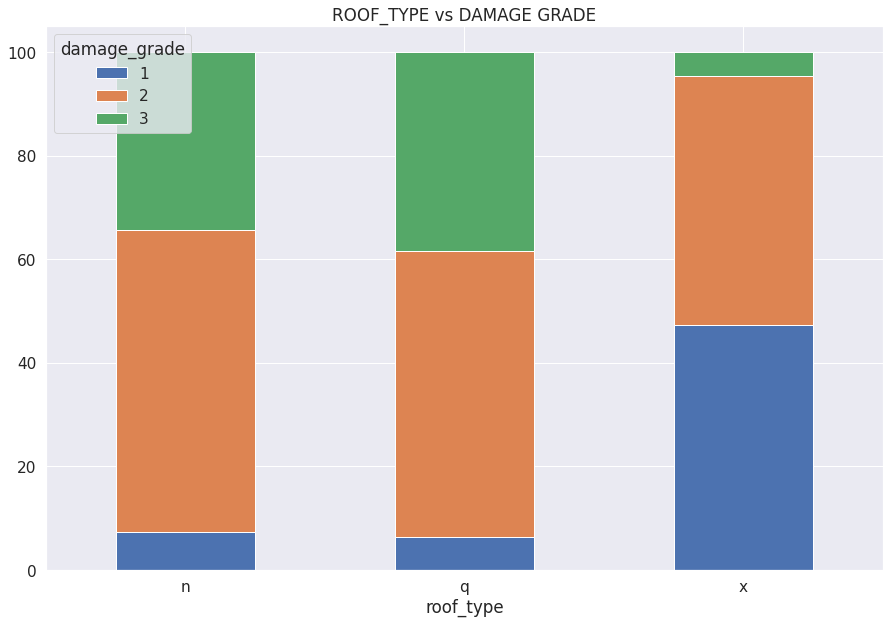

In [104]:
###ground floor type
# Calculate counts
df_temp = merge_2.groupby(['ground_floor_type','damage_grade']).size().reset_index(name='count')

# Set Index
df_temp = df_temp.set_index(['ground_floor_type', 'damage_grade'])

# Calculate Proportion of grade
df_temp = df_temp.groupby(level=0).apply(lambda x: 100 * x / float(x.sum())).reset_index()


df_temp = pd.pivot_table(df_temp, values='count', index=['ground_floor_type'], columns='damage_grade')

# Plot char
plt.figure(figsize=(12,5))
ax = sns.heatmap(data = df_temp, annot = True )
plt.xticks(rotation = 50)
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5), ncol=1)
plt.title("GROUND FLOOR TYPE VS DAMAGE GRADE")
plt.xlabel("Damage Grade")
plt.ylabel("Ground Floor Type")
plt.show()
print('')

##other floor type
# Calculate counts
df_temp_2= merge_2.groupby(['other_floor_type','damage_grade']).size().reset_index(name='percentage')

# Set Index
df_temp_2= df_temp_2.set_index(['other_floor_type', 'damage_grade'])

# Calculate Proportion of grade
df_temp_2= df_temp_2.groupby(level=0).apply(lambda x: 100 * x / float(x.sum())).reset_index()

#Restructuring and plotting the pie charts
d=df_temp_2.pivot_table(index='other_floor_type', columns='damage_grade', 
                        values='percentage', aggfunc='sum').plot(kind='pie',autopct='%.1f%%', subplots=True, 
                                                                 figsize=(20, 18),layout=(3,3), colors = ['red', 'green','blue','yellow'],title='OTHER FLOOR TYPE vs DAMAGE GRADE PERCENTAGE')

##roof type
# Calculate counts
df_temp_3= merge_2.groupby(['roof_type','damage_grade']).size().reset_index(name='count')

# Set Index
df_temp_3= df_temp_3.set_index(['roof_type', 'damage_grade'])

# Calculate Proportion of grades
df_temp_3= df_temp_3.groupby(level=0).apply(lambda x: 100 * x / float(x.sum())).reset_index()
# restructuring pivot table and plotting
d=df_temp_3.pivot_table(index='roof_type', columns='damage_grade', values='count', aggfunc='sum').plot.bar(rot=0, stacked=True,title='ROOF_TYPE vs DAMAGE GRADE',figsize=(15, 10))



#Question 8

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  import sys


              has_secondary_use_agriculture  ...  has_secondary_use_other
damage_grade                                 ...                         
1                                       829  ...                      175
2                                     10679  ...                      852
3                                      5269  ...                      307

[3 rows x 10 columns]


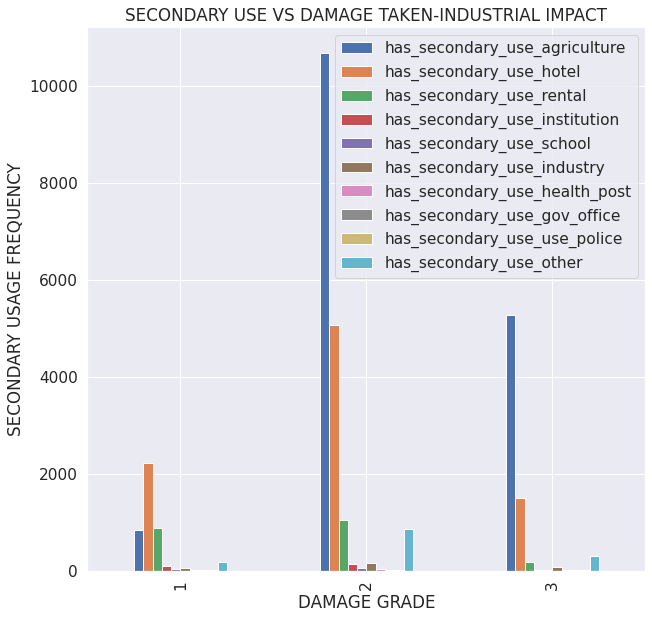

In [105]:
#Getting the data columns we need into a seperate frame
df_a=merge_2.iloc[:,29:39].copy()
numbers = merge_2["damage_grade"].copy()

#Inserting the damage_grade
df_a = df_a.join(numbers)
df_b=df_a.groupby(['damage_grade'])['has_secondary_use_agriculture',  
  'has_secondary_use_hotel',
  'has_secondary_use_rental',
  'has_secondary_use_institution',
  'has_secondary_use_school',
  'has_secondary_use_industry',
  'has_secondary_use_health_post',
  'has_secondary_use_gov_office',
  'has_secondary_use_use_police',
  'has_secondary_use_other'].apply(lambda x : x.astype(int).sum())
df_b
print(df_b)
# Plot a bar chart using the DF
ax = df_b.plot(kind="bar")

# Get a Matplotlib figure from the axes object for formatting purposes
fig = ax.get_figure()

# Change the plot dimensions (width, height)
fig.set_size_inches(10, 10)

# Change the axes labels
ax.set_xlabel("DAMAGE GRADE")
ax.set_ylabel("SECONDARY USAGE FREQUENCY")
ax.set_title("SECONDARY USE VS DAMAGE TAKEN-INDUSTRIAL IMPACT")

# Use this to show the plot in a new window
plt.show()


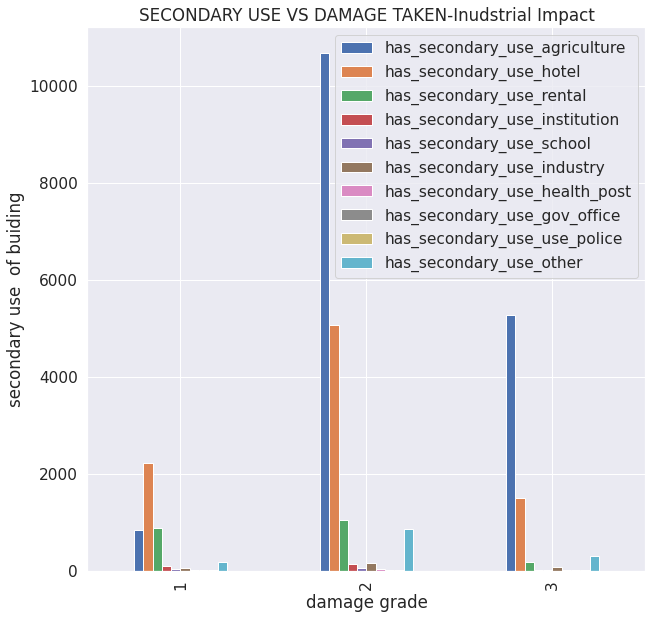

In [106]:
# Plot a bar chart using the DF
ax = df_b.plot(kind="bar")
# Get a Matplotlib figure from the axes object for formatting purposes
fig = ax.get_figure()
# Change the plot dimensions (width, height)
fig.set_size_inches(10, 10)
# Change the axes labels
ax.set_xlabel("damage grade")
ax.set_ylabel("secondary use  of buiding")
ax.set_title("SECONDARY USE VS DAMAGE TAKEN-Inudstrial Impact")
# Use this to show the plot in a new window
# plt.show()
# Export the plot as a PNG file
fig.savefig("2.png")

# Question 9

              Family Total
damage_grade              
1                    22991
2                   145593
3                    87834


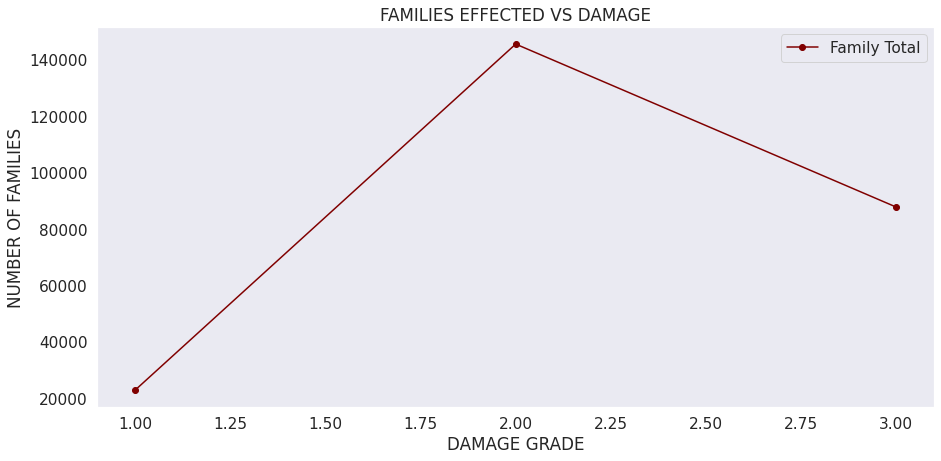

In [107]:
#Getting the count of families and damage grade seperately
merge_plot=merge_2[['damage_grade','count_families']].copy()

#group by and getting total famlies for damage grade
df_b=merge_plot.groupby(['damage_grade'])['count_families'].apply(lambda x : x.astype(int).sum()).to_frame('Family Total')
print(df_b)

#Plotting the family counts against the damage
fig, ax = plt.subplots(figsize=(15,7))

df_b.plot(kind='line',ax=ax,color='maroon',marker='o')
ax.set_ylabel('NUMBER OF FAMILIES')
ax.set_xlabel('DAMAGE GRADE')
ax.set_title('FAMILIES EFFECTED VS DAMAGE')

ax.grid()
plt.show()


#Question10

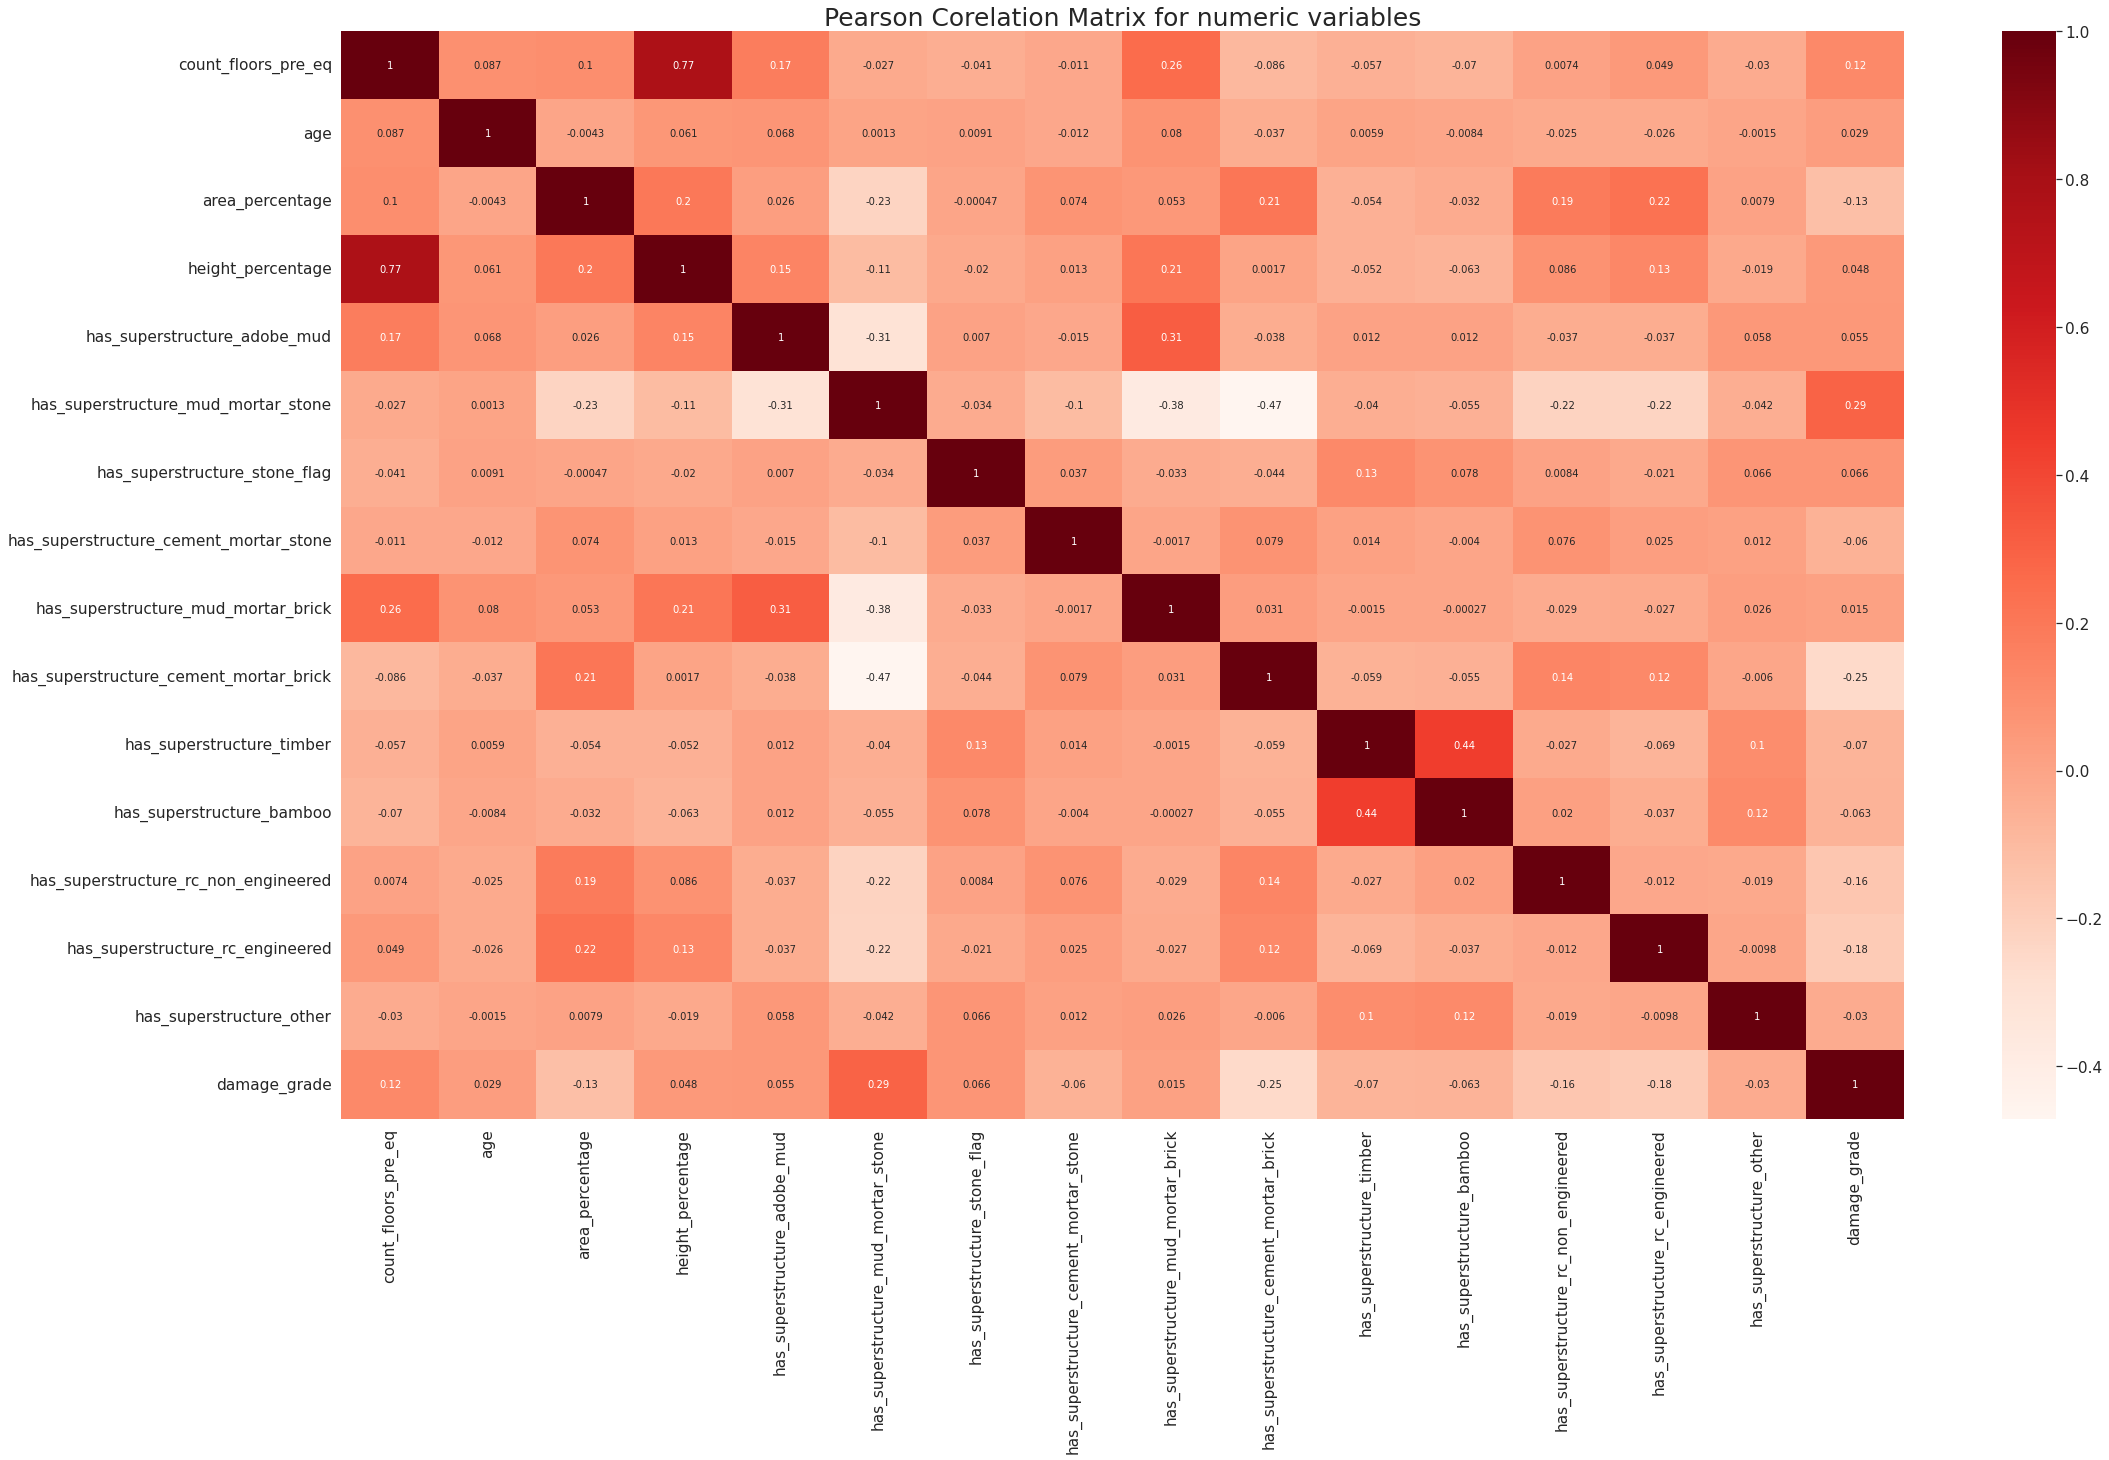

In [108]:
#DROPPING the categorical variables,secondary usages,geo  after getting a copy
merge_3=merge_2.copy()
merge_4=merge_3.drop(['building_id','land_surface_condition','foundation_type','roof_type','ground_floor_type','other_floor_type',
                      'position','plan_configuration','legal_ownership_status','has_secondary_use_agriculture',  
                      'has_secondary_use_hotel','has_secondary_use_rental','has_secondary_use_institution','has_secondary_use_school',
                      'has_secondary_use_industry','has_secondary_use_health_post','has_secondary_use_gov_office','has_secondary_use_use_police',
                      'has_secondary_use_other','has_secondary_use','geo_level_1_id','geo_level_2_id','geo_level_3_id','count_families'], axis = 1)

#Getting pearson corelation of numerical variables
cor_merge=merge_4.corr(method='pearson', min_periods=1)

#Correlation structure
plt.figure(figsize=(35,20))
plt.title("Pearson Corelation Matrix for numeric variables", fontsize = 25)
sns.heatmap(cor_merge, annot=True, cmap=plt.cm.Reds)
plt.show()